In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("C:/Users/Yash/Downloads/Sample - Superstore.xlsx")
df.info()
print("\nColumns:", df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [3]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
# First 5 rows
df.head()


Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Duplicate Rows: 0


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


### Sales and Profit by Category

<Figure size 1200x500 with 0 Axes>

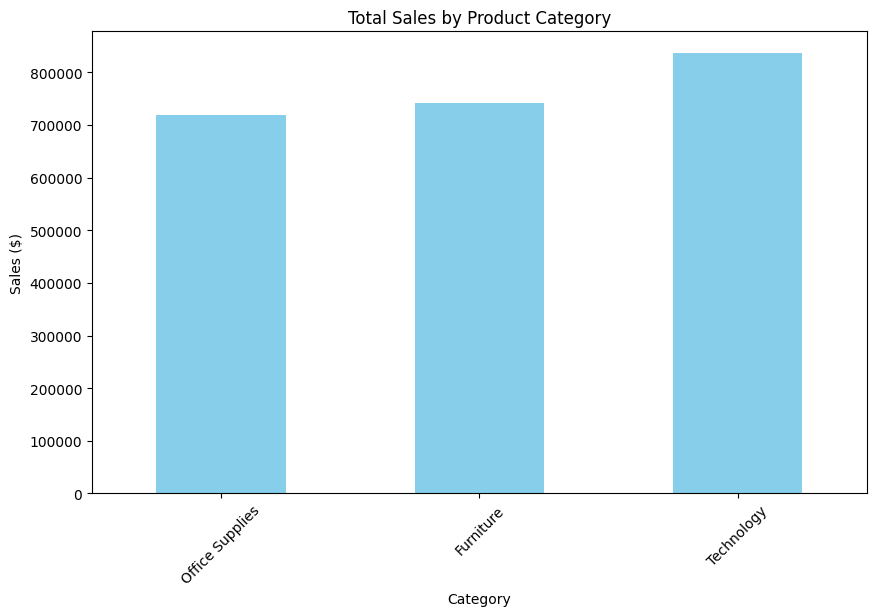

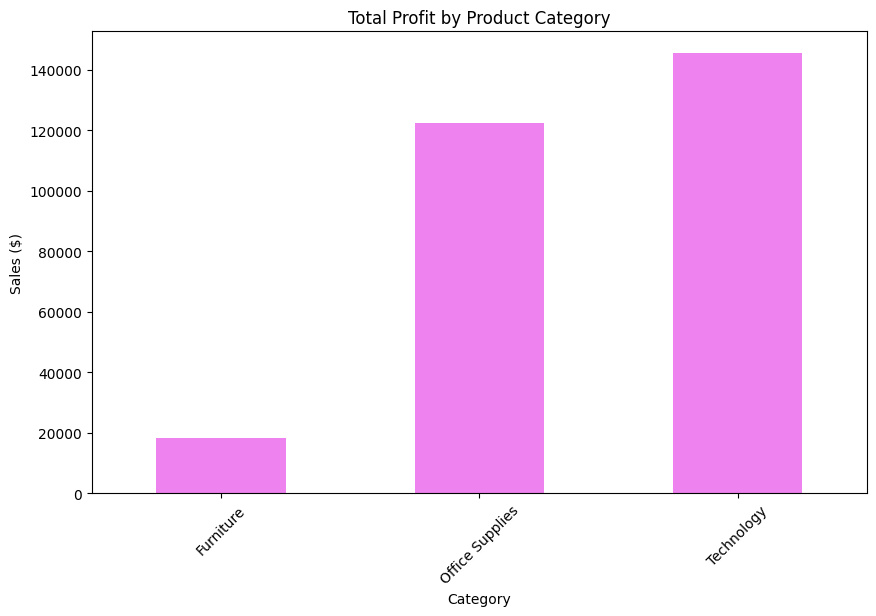

In [5]:
plt.figure(figsize=(12, 5))

sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=True)
plt.figure(figsize=(10,6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

sales_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=True)
plt.figure(figsize=(10,6))
sales_by_category.plot(kind='bar', color='violet')
plt.title('Total Profit by Product Category')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()


### Profit analysis by subcategory

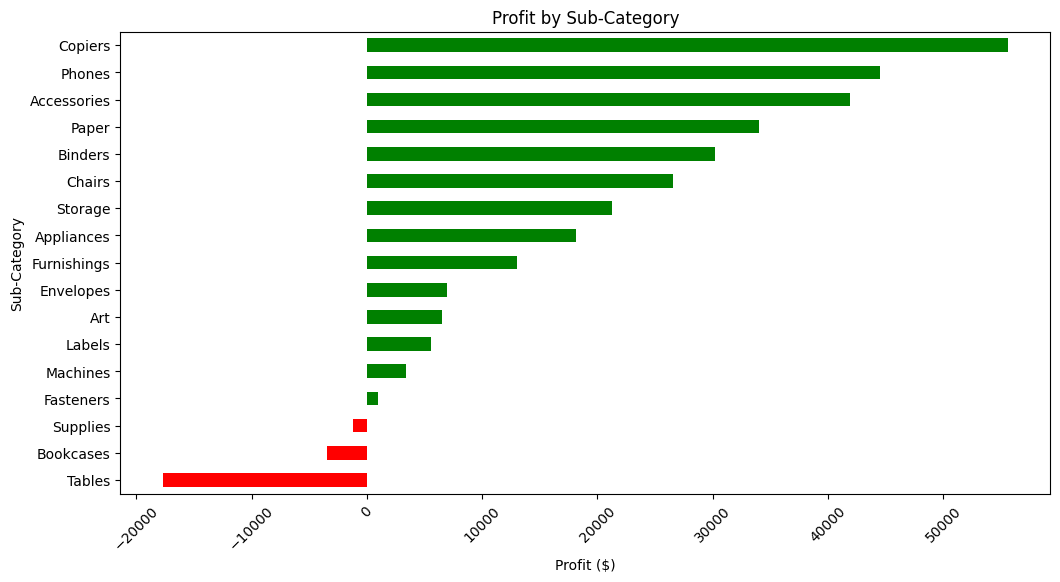

In [6]:
profit_by_subcat = df.groupby('Sub-Category')['Profit'].sum().sort_values()
plt.figure(figsize=(12,6))
profit_by_subcat.plot(kind='barh', color=['red' if x < 0 else 'green' for x in profit_by_subcat])
plt.title('Profit by Sub-Category')
# plt.grid(True)
plt.xticks(rotation=45)
plt.xlabel('Profit ($)')
plt.show()

### Sales trend Over time

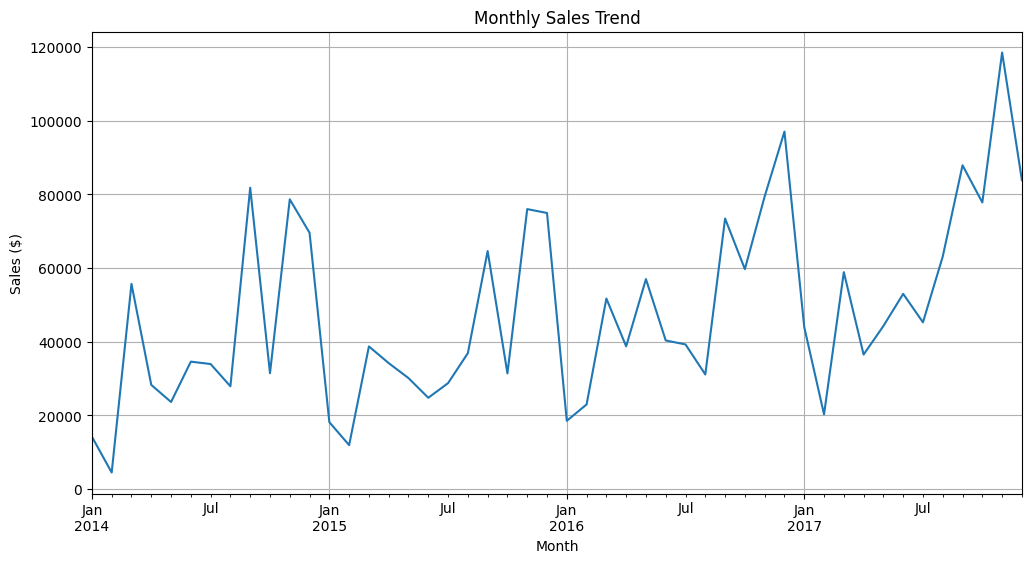

In [7]:
df['Month'] = df['Order Date'].dt.to_period('M')

# Group by month and sum sales
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()

### Geographical analysis(Sales by region)

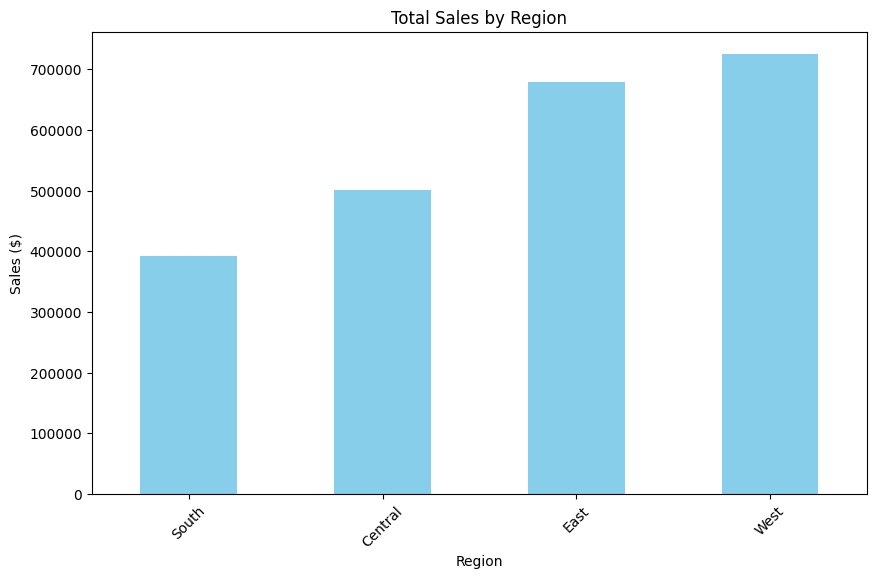

In [9]:
sales_by_category = df.groupby('Region')['Sales'].sum().sort_values(ascending=True)
plt.figure(figsize=(10,6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

                       Sales       Profit
Ship Mode                                
First Class     3.514284e+05   48969.8399
Same Day        1.283631e+05   15891.7589
Second Class    4.591936e+05   57446.6354
Standard Class  1.358216e+06  164088.7875


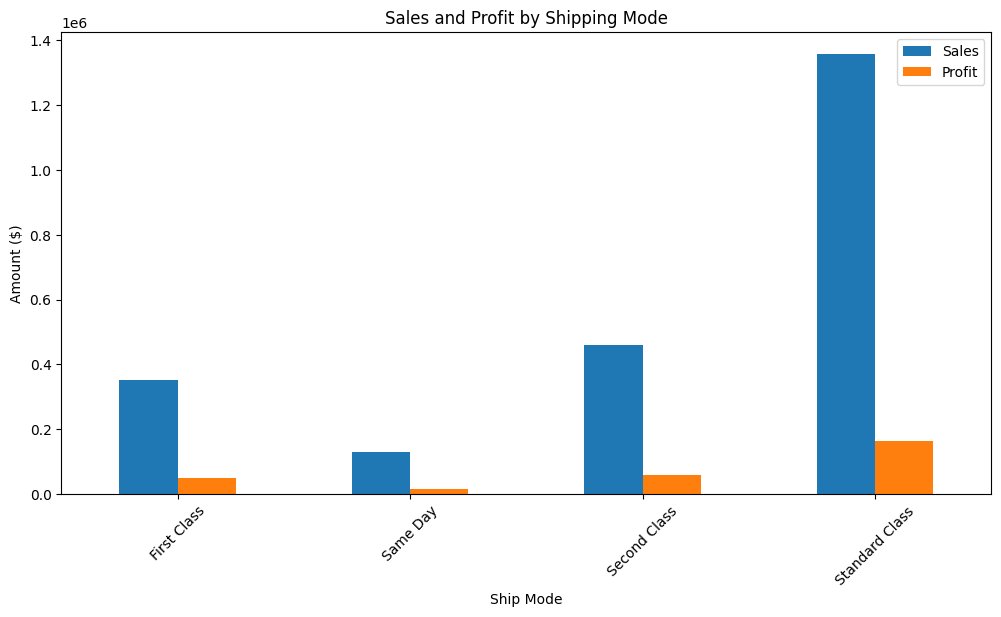

In [10]:
shipping_analysis = df.groupby('Ship Mode').agg({'Sales':'sum', 'Profit':'sum'})
print(shipping_analysis)
shipping_analysis.plot(kind='bar', figsize=(12,6))
plt.title('Sales and Profit by Shipping Mode')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.show()

### Top 10 Profitable Products

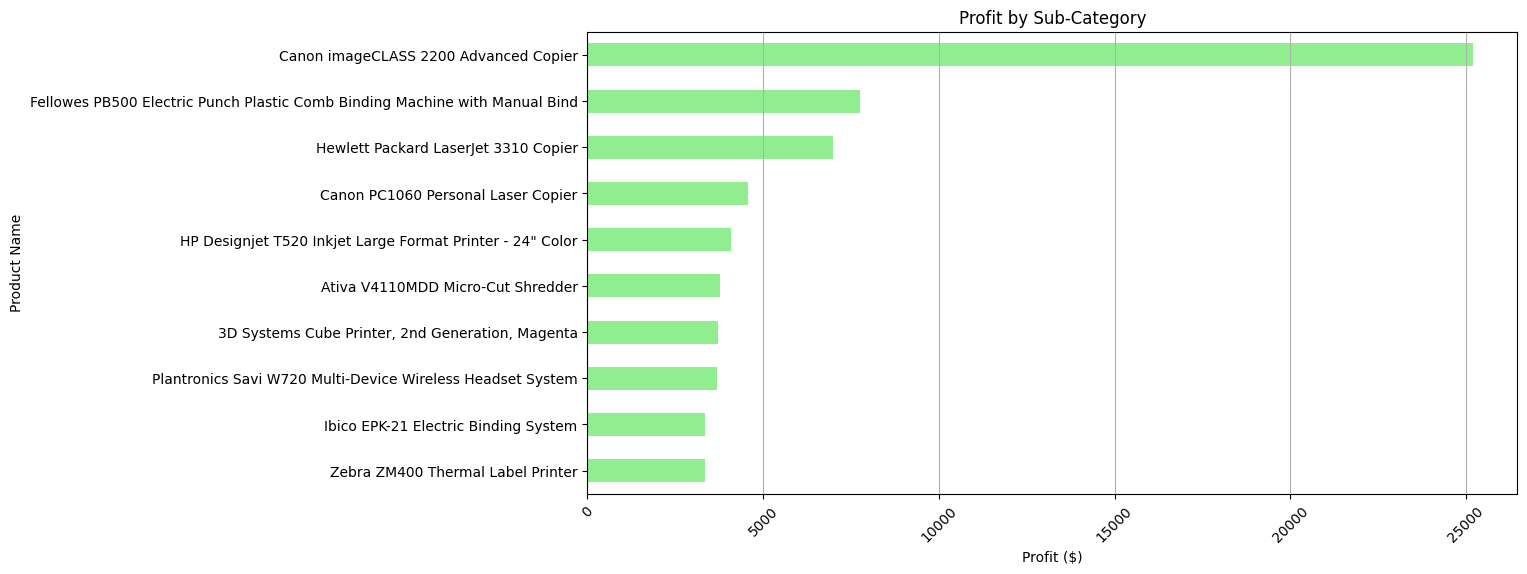

In [11]:
top_products = df.groupby('Product Name')['Profit'].sum().nlargest(10).sort_values()
plt.figure(figsize=(12,6))
top_products.plot(kind='barh', color='lightgreen')
plt.title('Profit by Sub-Category')
plt.grid(axis="x")
plt.xticks(rotation=45)
plt.xlabel('Profit ($)')
plt.show()

### Discount Strategy Optimiztion(Heat Map)

In [ ]:
#our goal is profit optimization, so we focus on:
# Profit drivers (Sales, Quantity)
# Profit killers (Discounts)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


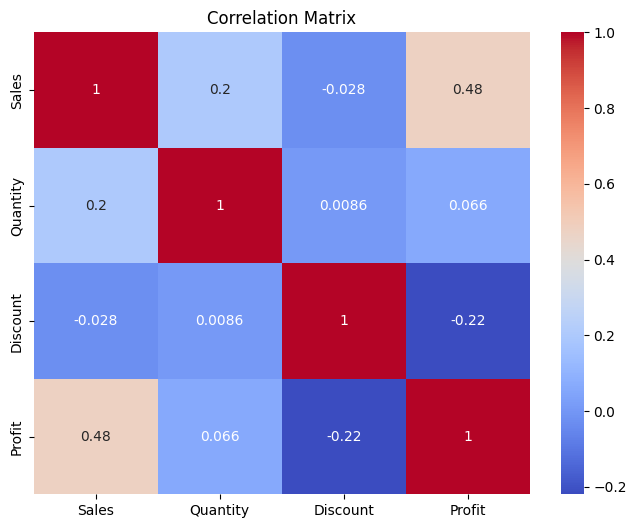

In [15]:
corr = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
print(corr)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Customer Segment analysis

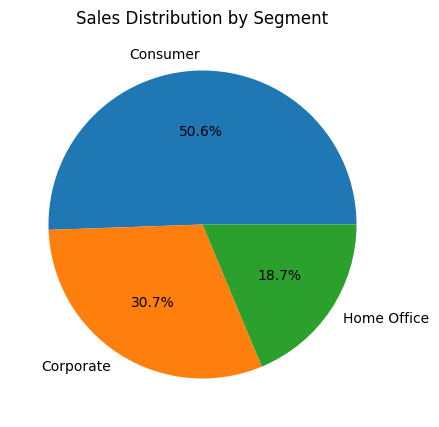

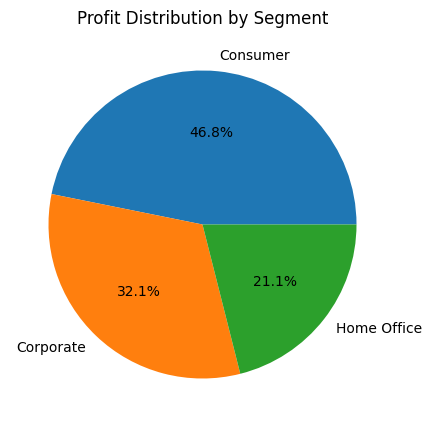

In [78]:
segment_data = df.groupby('Segment')[['Sales', 'Profit']].sum()

# Plot Sales pie chart
plt.figure(figsize=(5,5))
plt.pie(segment_data['Sales'], labels=segment_data.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Segment')
plt.show()

# Plot Profit pie chart
plt.figure(figsize=(5,5))
plt.pie(segment_data['Profit'], labels=segment_data.index, autopct='%1.1f%%')
plt.title('Profit Distribution by Segment')
plt.show()
